### Machine learning aplicado ao Airbnb 


<br>

##### <b> Problema de negócio </b> 

<br>

Em sua jornada profissional, Gulliver entendeu ser pertinente desenvolver modelos de aprendizagem de máquina voltados para compreender os preços de hospedagens. Para isso, optou por usar uma base de dados proveniente da AirBNB para São Paulo e, com algumas features coletadas, esteves foi desenvolver um modelo de regressão linear em três algoritmos de regressão: regressão linear múltipla, árvores de regressão e random-forest.
 Inspirado na necessidade de Gulliver, estamos fazendo uso de dados da AirBNB de São Paulo com o objetivo de desenvolver três modelos para predizer o preço de uma hospedagem no AirBNB para São Paulo, e utilizar o melhor deles como nossa solução final.




<br>
<br>

<img src="https://aloalobahia.com/images/p/airnbccrescimentoe_alo_alo_bahia.jpg">

<br>
<hr>
<br>
<br>

#### 1- bibliotecas a leitura dos dados 

vamos iniciar importando os pacotes necessários para esse projeto de Machine learning, e a carga dos dados.



<br>

In [1]:
!pip install bayesian-optimization
!pip install hyperopt

In [2]:
# bibliotecas 
import os 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

from bayes_opt import BayesianOptimization

from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split, KFold, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [3]:
path = "/content/drive/MyDrive/FIAP/machine-learning-global/dataset_airbnb.csv"
df = pd.read_csv(path, sep=";")
df.head()

,room_id,room_type,city,borough,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,price,property_type
0,3732200,Shared room,Sao Paulo,SAO PAULO,Mooca,0,0.0,5,1.0,47.0,House
1,2247926,Shared room,Sao Paulo,SAO PAULO,Pinheiros,0,0.0,16,1.0,21.0,Bed & Breakfast
2,2674673,Shared room,Sao Paulo,SAO PAULO,Itaquera,0,0.0,8,1.0,311.0,House
3,2996011,Shared room,Sao Paulo,SAO PAULO,Penha,0,0.0,5,1.0,389.0,Apartment
4,2939182,Shared room,Sao Paulo,SAO PAULO,Iguatemi,0,0.0,4,1.0,311.0,House


In [4]:
df["reviews"].value_counts()

0      5275
1      1134
2       658
3       502
4       391
       ... 
170       1
138       1
113       1
105       1
167       1
Name: reviews, Length: 128, dtype: int64

In [5]:
# número de linhas e colunas  
print(f"número de linhas: {df.shape[0]} | número de colunas: {df.shape[1]}")

número de linhas: 11118 | número de colunas: 11


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11118 entries, 0 to 11117
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   room_id               11118 non-null  int64  
 1   room_type             11118 non-null  object 
 2   city                  11118 non-null  object 
 3   borough               11118 non-null  object 
 4   neighborhood          11118 non-null  object 
 5   reviews               11118 non-null  int64  
 6   overall_satisfaction  11118 non-null  float64
 7   accommodates          11118 non-null  int64  
 8   bedrooms              11118 non-null  float64
 9   price                 11118 non-null  float64
 10  property_type         11118 non-null  object 
dtypes: float64(3), int64(3), object(5)
memory usage: 955.6+ KB


In [7]:
# tipo das colunas 
df.dtypes

room_id                   int64
room_type                object
city                     object
borough                  object
neighborhood             object
reviews                   int64
overall_satisfaction    float64
accommodates              int64
bedrooms                float64
price                   float64
property_type            object
dtype: object

In [8]:
# estátistica descritiva 
df.describe()

,room_id,reviews,overall_satisfaction,accommodates,bedrooms,price
count,1.111800e+04,11118.000000,11118.000000,11118.000000,11118.000000,11118.000000
mean,1.097865e+07,6.164598,1.752339,3.040295,1.317143,84.027613
std,6.087036e+06,14.204120,2.322813,2.345101,0.897948,223.382397
min,1.077400e+04,0.000000,0.000000,1.000000,0.000000,3.000000
25%,4.758136e+06,0.000000,0.000000,2.000000,1.000000,25.000000
50%,1.233381e+07,1.000000,0.000000,2.000000,1.000000,43.000000
75%,1.646424e+07,6.000000,4.500000,4.000000,2.000000,72.000000
max,1.962464e+07,248.000000,5.000000,16.000000,10.000000,10905.000000


<br>
<br>
<br>


#### 2- Análise Exploratória de dados 


nesta etapa vamos explorar nosso dataset, tirar algumas medidas estátisticas e ver o principais insights que podemos encontrar nestes dados, e assim partir para a modelagem levando em consideração nossas descobertas com esta análise.


<br>
<br>

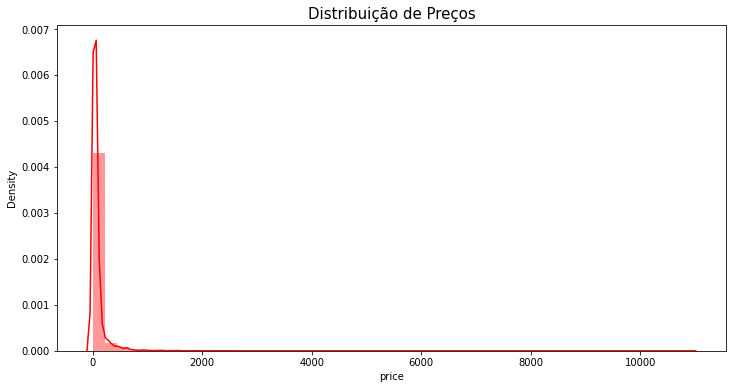




média de preços: 84.02761288001439
desvio padrão de preços: 223.37235119534895


In [9]:
# distribuição do target (price)
plt.figure(figsize=(12,6))
sns.distplot(df["price"], color='red', kde=True)
plt.title("Distribuição de Preços", fontsize=15)
plt.show()



media = np.mean(df["price"])
desvio_padrao = np.std(df["price"])


print("\n\n")
print(f"média de preços: {media}")
print(f"desvio padrão de preços: {desvio_padrao}")

<br>



<br>
<br>

##### Quais tipos de quartos possuem os maiores aluguéis ? 


<br>



número de Quartos compartilhados: 463
número de Casas: 5880
número de Quartos Privados: 4775






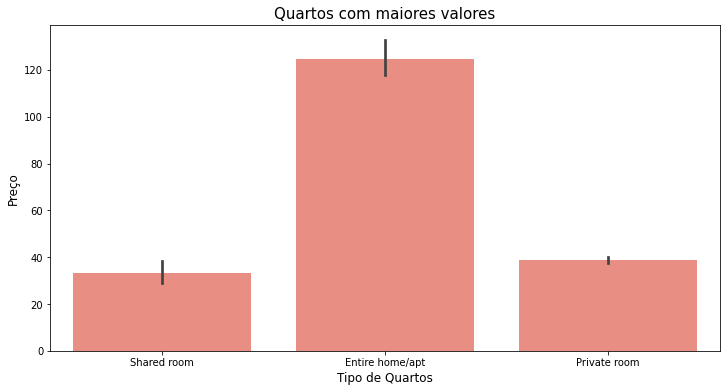

In [10]:
# comparação de quartos e preços 

print("\n")

qtd_shared_room = len(df[df["room_type"]=="Shared room"])
qtd_entire_home = len(df[df["room_type"]=="Entire home/apt"])
qtd_private_room = len(df[df["room_type"]=="Private room"])

print(f"número de Quartos compartilhados: {qtd_shared_room}")
print(f"número de Casas: {qtd_entire_home}")
print(f"número de Quartos Privados: {qtd_private_room}")
print("\n\n\n")



plt.figure(figsize=(12,6))
sns.barplot(x="room_type", y="price", data=df, color="salmon")
plt.ylabel("Preço", fontsize=12)
plt.xlabel("Tipo de Quartos", fontsize=12)
plt.title("Quartos com maiores valores", fontsize=15)
plt.show()

<br>
<br>

Através do gráfico conseguimos ver que os maiores valores são para aluguéis de casas completas, seguidos de quartos privados, e por último quartos compartilhados que é a categoria mais básica dos clientes da AirBNB, seguindo a lógica dos preços da plataforma.  


<br>
<br>


##### Quais bairros possuem avaliações melhores ? 


<br>

In [11]:
df["neighborhood"].value_counts()

Jardim Paulista          944
Itaim Bibi               923
Pinheiros                712
Bela Vista               583
Consolação               547
                        ... 
Itaim Paulista             1
Ouro Fino Paulista         1
Itaquaquecetuba            1
Cajamar                    1
São Lourenço da Serra      1
Name: neighborhood, Length: 138, dtype: int64

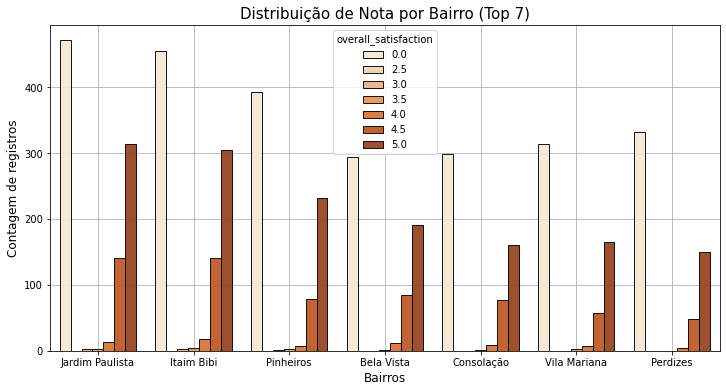

In [12]:
# distribuição de nota por bairros (top 7)

print("\n")

plt.figure(figsize=(12,6))
sns.countplot(x='neighborhood', hue = 'overall_satisfaction',data = df, palette='Oranges', order=pd.value_counts(df['neighborhood']).iloc[:7].index, edgecolor="black",linewidth = 1, zorder = 3, alpha = 0.9 )
plt.grid(True, zorder = 0)
plt.title("Distribuição de Nota por Bairro (Top 7)", fontsize=15)
plt.xlabel('Bairros', fontsize=12)
plt.ylabel('Contagem de registros', fontsize=12)
plt.show()


print('\n\n')

Os bairros de SP com as melhores notas, as acomodações em cada região tem uma distribuição parecida quando olhamos para as notas em cada bairro, Jardim paulista é o bairro com o maior número de notas 5.0 com cerca de <b> 944 </b> avaliações, logo em seguida o Itaim Bibi recebeu cerca de <b> 923 </b> avaliações, Pinheiros segue com <b> 712 </b>, são os três bairros com as melhores avaliações, e esses fazem parte dos bairros mais luxuosos de São Paulo.  


<br>
<br>
<br>
<br>

##### Qual a média de notas por bairros ? 


<br>

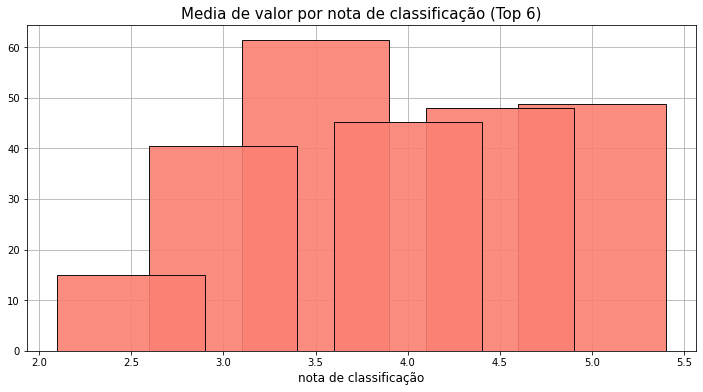

In [13]:
# média de notas (top 6)

print("\n")

df_sorted_desc = df[['overall_satisfaction', 'price']].groupby('overall_satisfaction').mean().reset_index().sort_values('price',ascending=False).iloc[1:]

plt.figure(figsize=(12,6))
plt.bar(df_sorted_desc['overall_satisfaction'],df_sorted_desc['price'],data=df_sorted_desc, edgecolor="black",linewidth = 1, color = 'salmon', zorder = 3, alpha = 0.9)
plt.grid(True, zorder = 0)
plt.title("Media de valor por nota de classificação (Top 6)", fontsize=15)
plt.xlabel('nota de classificação', fontsize=12)
plt.show()

print("\n\n")

<br>
<br>

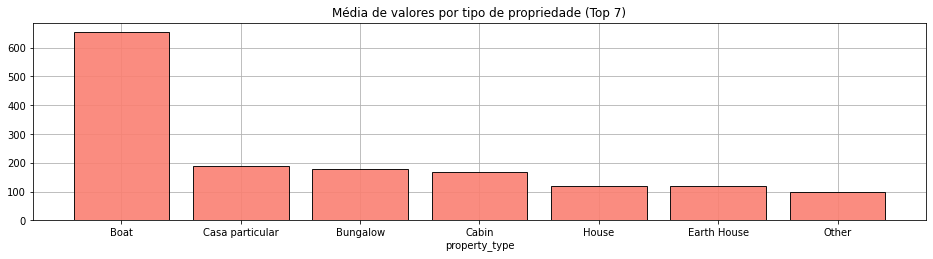

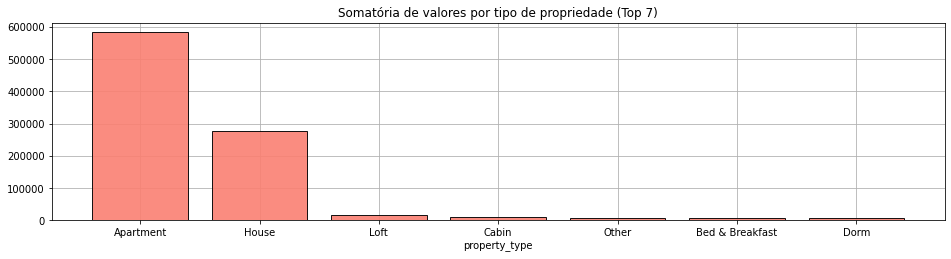

In [14]:
# Somatório e Média de valores por Tipo de propriedades 

print("\n")

df_sorted_desc = df[['property_type', 'price']].groupby('property_type').mean().reset_index().sort_values('price',ascending=False).iloc[:7]

plt.figure(figsize=(16,8))
plt.subplot(2,1,2) 
plt.bar(df_sorted_desc['property_type'],df_sorted_desc['price'],data=df_sorted_desc, edgecolor="black",linewidth = 1, color = 'salmon', zorder = 3, alpha = 0.9)
plt.grid(True, zorder = 0)
plt.title("Média de valores por tipo de propriedade (Top 7)")
plt.xlabel('property_type')
plt.show()

df_sorted_desc = df[['property_type', 'price']].groupby('property_type').sum().reset_index().sort_values('price',ascending=False).iloc[:7]

plt.figure(figsize=(16,8))
plt.subplot(2,1,2) 
plt.bar(df_sorted_desc['property_type'],df_sorted_desc['price'],data=df_sorted_desc, edgecolor="black",linewidth = 1, color = 'salmon', zorder = 3, alpha = 0.9)
plt.grid(True, zorder = 0)
plt.title("Somatória de valores por tipo de propriedade (Top 7)")
plt.xlabel('property_type')
plt.show()


print('\n\n')

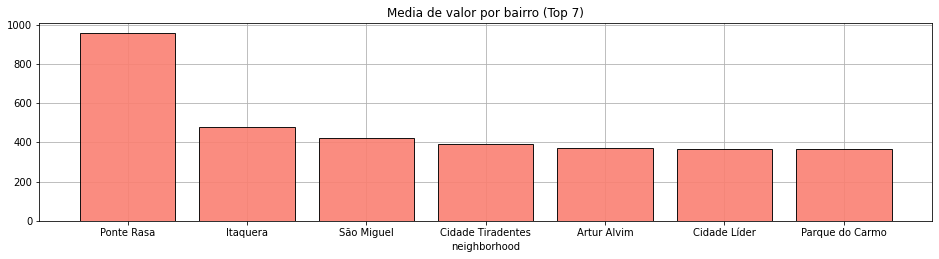

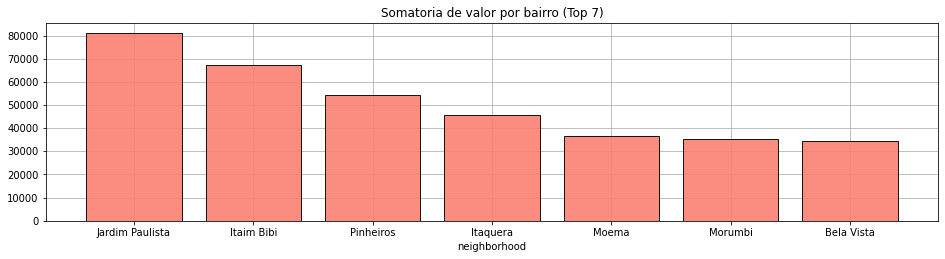

In [15]:
# Média de valor por Bairro 


df_sorted_desc = df[['neighborhood', 'price']].groupby('neighborhood').mean().reset_index().sort_values('price',ascending=False).iloc[:7]
plt.figure(figsize=(16,8))
plt.subplot(2,1,2) 

plt.bar(df_sorted_desc['neighborhood'],df_sorted_desc['price'],data=df_sorted_desc, edgecolor="black",linewidth = 1, color = 'salmon', zorder = 3, alpha = 0.9)
plt.grid(True, zorder = 0)
plt.title("Media de valor por bairro (Top 7)")
plt.xlabel('neighborhood')
plt.show()

df_sorted_desc = df[['neighborhood', 'price']].groupby('neighborhood').sum().reset_index().sort_values('price',ascending=False).iloc[:7]
plt.figure(figsize=(16,8))
plt.subplot(2,1,2) 

plt.bar(df_sorted_desc['neighborhood'],df_sorted_desc['price'],data=df_sorted_desc, edgecolor="black",linewidth = 1, color = 'salmon', zorder = 3, alpha = 0.9)
plt.grid(True, zorder = 0)
plt.title("Somatoria de valor por bairro (Top 7)")
plt.xlabel('neighborhood')
plt.show()

In [16]:
def scatter_plot_r(x, 
                   y, 
                   title_label, 
                   x_label, 
                   y_label):
    """"Plota um gráfico de linhas com dados de previsão e de teste. 
    Args:
          x: variavel independente
          y: variavel dependente
          title_label(str): título do gráfico.
          x_label(str): Nome do label do eixo X.
          y_label(str): Nome do label do eixo Y.
    """
    #Calcula o coef. de Correlação
    pearson = stats.pearsonr(x,y)[0]
    # Determina o estilo
    sns.set_style("whitegrid", {'grid.linestyle': ':'})
    # Determina o tamanho do gráfico.
    fig, ax = plt.subplots(figsize=(9,8))
    #plota o gráfico
    ax = sns.regplot(x=x,
                     y=y,
                     robust = False, # True: ignora os outliers,demora mais para calcular a regressão linear
                     scatter_kws={"color":'#0000CD',"alpha":0.2,"s":50},
                     line_kws={"color":'#00FFFF',"alpha":0.9,"lw":1},
                     label="Coeficiente de Correlação = {0:.2f}".format(pearson))
    #local da legenda
    ax.legend(loc="best")
    #plota titulo
    ax.set_title(title_label, size = 15, fontdict={'family': 'serif','color' : 'black','weight': 'bold'})
    #plota eixo x
    ax.set_xlabel(x_label, horizontalalignment='left', x=0, size = 14)
    #plota eixo y
    ax.set_ylabel(y_label,horizontalalignment='left', y=0, size = 14)
    #retira as linhas que delimitam o gráfico
    sns.despine(top=True, right=True, left=False, bottom=False)
    #seta o Zero como limite
    plt.ylim(ymin=0)  
    #Mostra o gráfico
    plt.show()

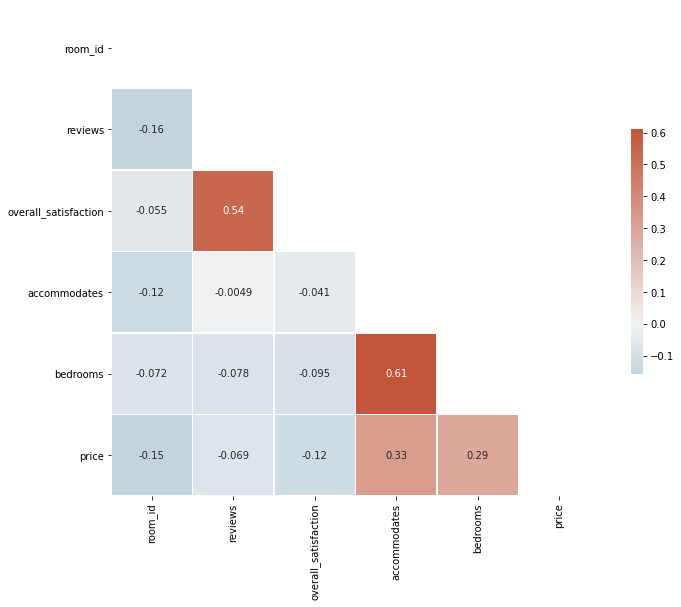

In [17]:
# Gráfico de correlação de Pearson

print("\n")

corr_celular = df.corr()
mask = np.triu(np.ones_like(corr_celular, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr_celular, mask=mask, cmap=cmap, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
plt.show()

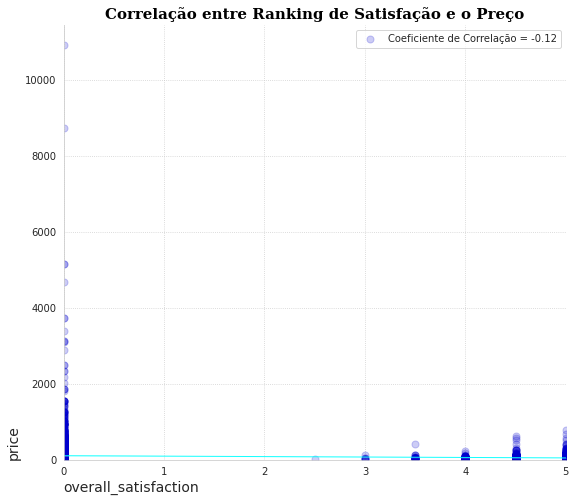

In [18]:
scatter_plot_r(df['overall_satisfaction'], df['price'], "Correlação entre Ranking de Satisfação e o Preço", "overall_satisfaction", "price")

<br>


analisando as correlações das váriaveis com o target <b> Price </b> identificamos que temos poucas correlações positivas, apenas as váriaveis <b> accommodates </b> e <b> bedrooms </b> com uma correlção de pearson por volta de 0.33 e .29 considerasas baixas.


<br>



<br>
<br>
<hr>
<br>
<br>

##### 3- Modelagem 


etapa que vamos modelar os dados para serem usados no treinamendo dos modelos


<br>

In [19]:
# valores nulos 
df.isnull().sum()

room_id                 0
room_type               0
city                    0
borough                 0
neighborhood            0
reviews                 0
overall_satisfaction    0
accommodates            0
bedrooms                0
price                   0
property_type           0
dtype: int64

In [20]:
# retirar variáveis 
df.drop("room_id",  axis=1, inplace=True)

In [21]:
# categóricas e numéricas 
cat_cols = df.select_dtypes(include="object").columns
num_cols = df.select_dtypes(exclude="object").columns


# dummies 
dummies = pd.get_dummies(df[cat_cols], prefix=cat_cols, drop_first=True)
df = pd.concat([df, dummies], axis=1)
df.drop(cat_cols, axis=1, inplace=True)

<br>
<br>
<hr>
<br>
<br>
<br>


#### 4- Validação Cruzada 


vamos aplicar validação cruzada utilizando o <b> KFold </b> nos três modelos principais. 


<br>
<br>

#### << Modelo de Regressão Linear -> 4º Lugar >>

In [22]:
X = df.drop("price", axis=1)
y = df['price']

# validação cruzada 
kfold = KFold(n_splits=5, shuffle=True, random_state=42) 
rmse_results = []
mse_results = []
mae_results = []
r2_results = []

fold = 0
print('<<< Regressão Linear >>>')
print('\n')


for train_index, test_index in kfold.split(X):
    fold += 1
    print('_'*23)
    print("\n")
    print('Fold: ', fold)
    print('Treino: ',train_index.shape[0])
    print('Teste: ', test_index.shape[0])
    


    # separando os dados 
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]  
    

    # Normalizer 
    normalizer = MinMaxScaler()
    X_train = normalizer.fit_transform(X_train)
    X_test = normalizer.transform(X_test)
    
    # modelo Linear Regressão
    model = LinearRegression()
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)


    # métricas 
    mse = mean_squared_error(y_test,y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test,y_pred)
    r2 = r2_score(y_test, y_pred)

    mse_results.append(mse)
    rmse_results.append(rmse)
    mae_results.append(mae)
    r2_results.append(r2)
    
    print('-'*23)
    print('Validação Cruzada (RL):')
    print('RMSE: {}'.format(rmse))
    print('MSE: {}'.format(mse))
    print('MAE: {}'.format(mae))
    print("R2: {}".format(r2))

print('_'*54)
print('Cross-Validation (Regressão Linear):')
print('-> RMSE (Root Mean Squared Error): {};'.format(np.mean(rmse_results))) 
print('-> MSE (Mean Squared Error): {};'.format(np.mean(mse_results)))
print('-> MAE (Mean Absolute Error): {};'.format(np.mean(mae_results))) 
print('-> R2 (Root Squared): {}.'.format(np.mean(r2_results)))
print('_'*54)

<<< Regressão Linear >>>


_______________________


Fold:  1
Treino:  8894
Teste:  2224
-----------------------
Validação Cruzada (RL):
RMSE: 2173853908618.1912
MSE: 4.7256408160145865e+24
MAE: 86390699621.43973
R2: -1.0653996987871665e+20
_______________________


Fold:  2
Treino:  8894
Teste:  2224
-----------------------
Validação Cruzada (RL):
RMSE: 284.2248370499042
MSE: 80783.75799604457
MAE: 68.15942558453237
R2: 0.09915235892041396
_______________________


Fold:  3
Treino:  8894
Teste:  2224
-----------------------
Validação Cruzada (RL):
RMSE: 1266536525082.2634
MSE: 1.6041147693674548e+24
MAE: 38493889694.43728
R2: -5.751587069467566e+19
_______________________


Fold:  4
Treino:  8895
Teste:  2223
-----------------------
Validação Cruzada (RL):
RMSE: 267367233254.88776
MSE: 7.148523741837355e+22
MAE: 5670723281.039271
R2: -4.456547679596728e+18
_______________________


Fold:  5
Treino:  8895
Teste:  2223
-----------------------
Validação Cruzada (RL):
RMSE: 1700317674895.

#### << Modelo KNN -> 3º Lugar >>

In [23]:
X = df.drop("price", axis=1)
y = df['price']

# validação cruzada 
kfold = KFold(n_splits=5, shuffle=True, random_state=42) 

rmse_results = []
mse_results = []
mae_results = []
r2_results = []

fold = 0
print('<<< K Nearest Neighbors >>>')
print('\n')


for train_index, test_index in kfold.split(X):
    fold += 1
    print('_'*23)
    print("\n")
    print('Fold: ', fold)
    print('Treino: ',train_index.shape[0])
    print('Teste: ', test_index.shape[0])
    


    # separando os dados 
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]  
    

    # Normalizer 
    normalizer = MinMaxScaler()
    X_train = normalizer.fit_transform(X_train)
    X_test = normalizer.transform(X_test)
    
    # modelo K Nearest Neighbors
    model_knn = KNeighborsRegressor()
    model_knn.fit(X_train,y_train)
    y_pred_knn = model_knn.predict(X_test)


    # métricas 
    mse = mean_squared_error(y_test,y_pred_knn)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred_knn))
    mae = mean_absolute_error(y_test,y_pred_knn)
    r2 = r2_score(y_test, y_pred_knn)

    mse_results.append(mse)
    rmse_results.append(rmse)
    mae_results.append(mae)
    r2_results.append(r2)
    print('-'*23)
    print('Validação Cruzada (KNN):')
    print('RMSE: {}'.format(rmse))
    print('MSE: {}'.format(mse))
    print('MAE: {}'.format(mae))
    print("R2: {}".format(r2))

print('_'*54)
print('Cross-Validation (K Nearest Neighbors):')
print('-> RMSE (Root Mean Squared Error): {};'.format(np.mean(rmse_results))) 
print('-> MSE (Mean Squared Error): {};'.format(np.mean(mse_results)))
print('-> MAE (Mean Absolute Error): {}.'.format(np.mean(mae_results))) 
print('-> R2 (Root Squared): {}'.format(np.mean(r2_results)))
print('_'*54)

<<< K Nearest Neighbors >>>


_______________________


Fold:  1
Treino:  8894
Teste:  2224
-----------------------
Validação Cruzada (KNN):
RMSE: 199.9641354534005
MSE: 39985.655467625904
MAE: 58.224100719424456
R2: 0.09852003252875752
_______________________


Fold:  2
Treino:  8894
Teste:  2224
-----------------------
Validação Cruzada (KNN):
RMSE: 293.4955059832673
MSE: 86139.61203237412
MAE: 62.13767985611511
R2: 0.03942737713842892
_______________________


Fold:  3
Treino:  8894
Teste:  2224
-----------------------
Validação Cruzada (KNN):
RMSE: 150.40631109520035
MSE: 22622.058417266187
MAE: 52.80017985611511
R2: 0.1888813620935923
_______________________


Fold:  4
Treino:  8895
Teste:  2223
-----------------------
Validação Cruzada (KNN):
RMSE: 129.55534730837755
MSE: 16784.58801619433
MAE: 51.69113810166442
R2: -0.04638831006151234
_______________________


Fold:  5
Treino:  8895
Teste:  2223
-----------------------
Validação Cruzada (KNN):
RMSE: 260.5529702237103
MSE: 67887

#### << Modelo Random Forest Regressor -> 2º Lugar >>

In [24]:
X = df.drop("price", axis=1)
y = df['price']

# validação cruzada 
kfold = KFold(n_splits=5, shuffle=True, random_state=42) 
rmse_results = []
mse_results = []
mae_results = []
r2_results = []

fold = 0
print('<<< Random Forest >>>')
print('\n')


for train_index, test_index in kfold.split(X):
    fold += 1
    print('_'*23)
    print("\n")
    print('Fold: ', fold)
    print('Treino: ',train_index.shape[0])
    print('Teste: ', test_index.shape[0])
    


    # separando os dados 
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]  
    

    # Normalizer 
    normalizer = MinMaxScaler()
    X_train = normalizer.fit_transform(X_train)
    X_test = normalizer.transform(X_test)
    
    # modelo Random Forest
    model_rf = RandomForestRegressor()
    model_rf.fit(X_train,y_train)
    y_pred_rf = model_rf.predict(X_test)


    # métricas 
    mse = mean_squared_error(y_test,y_pred_rf)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))
    mae = mean_absolute_error(y_test,y_pred_rf)
    r2 = r2_score(y_test, y_pred_rf)

    mse_results.append(mse)
    rmse_results.append(rmse)
    mae_results.append(mae)
    r2_results.append(r2)
    print('-'*23)
    print('Validação Cruzada (RF):')
    print('RMSE: {}'.format(rmse))
    print('MSE: {}'.format(mse))
    print('MAE: {}'.format(mae))
    print("R2: {}".format(r2))

print('_'*54)
print('Cross-Validation (Random Forest):')
print('-> RMSE (Root Mean Squared Error): {};'.format(np.mean(rmse_results))) 
print('-> MSE (Mean Squared Error): {};'.format(np.mean(mse_results)))
print('-> MAE (Mean Absolute Error): {}.'.format(np.mean(mae_results))) 
print('-> R2 (Root Squared): {}'.format(np.mean(r2_results)))
print('_'*54)

<<< Random Forest >>>


_______________________


Fold:  1
Treino:  8894
Teste:  2224
-----------------------
Validação Cruzada (RF):
RMSE: 178.0528608921545
MSE: 31702.821271880926
MAE: 51.43600315124222
R2: 0.2852572265056157
_______________________


Fold:  2
Treino:  8894
Teste:  2224
-----------------------
Validação Cruzada (RF):
RMSE: 311.58151063329615
MSE: 97083.03776852683
MAE: 60.68487853055054
R2: -0.08260655027833597
_______________________


Fold:  3
Treino:  8894
Teste:  2224
-----------------------
Validação Cruzada (RF):
RMSE: 148.5241226990191
MSE: 22059.41502351328
MAE: 46.610035413550676
R2: 0.20905505870201302
_______________________


Fold:  4
Treino:  8895
Teste:  2223
-----------------------
Validação Cruzada (RF):
RMSE: 126.17017917676712
MSE: 15918.914113497518
MAE: 45.64583725590843
R2: 0.0075797141302816895
_______________________


Fold:  5
Treino:  8895
Teste:  2223
-----------------------
Validação Cruzada (RF):
RMSE: 244.6976730740977
MSE: 59876.95120787

#### << Modelo Decision Tree -> 1º Lugar >>

In [25]:
X = df.drop("price", axis=1)
y = df['price']

# validação cruzada 
kfold = KFold(n_splits=5, shuffle=True, random_state=42) 

rmse_results = []
mse_results = []
mae_results = []
r2_results = []

fold = 0
print('<<< Decision Tree >>>')
print('\n')


for train_index, test_index in kfold.split(X):
    fold += 1
    print('_'*23)
    print("\n")
    print('Fold: ', fold)
    print('Treino: ',train_index.shape[0])
    print('Teste: ', test_index.shape[0])
    


    # separando os dados 
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]  
    

    # Normalizer 
    normalizer = MinMaxScaler()
    X_train = normalizer.fit_transform(X_train)
    X_test = normalizer.transform(X_test)
    
    # modelo Random Forest
    model_dt = DecisionTreeRegressor(random_state=42)
    model_dt.fit(X_train,y_train)
    y_pred_dt = model_rf.predict(X_test)


    # métricas 
    mse = mean_squared_error(y_test,y_pred_dt)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred_dt))
    mae = mean_absolute_error(y_test,y_pred_dt)
    r2 = r2_score(y_test, y_pred_dt)

    mse_results.append(mse)
    rmse_results.append(rmse)
    mae_results.append(mae)
    r2_results.append(r2)
    print('-'*23)
    print('Validação Cruzada (DT):')
    print('RMSE: {}'.format(rmse))
    print('MSE: {}'.format(mse))
    print('MAE: {}'.format(mae))
    print("R2: {}".format(r2))

print('_'*54)
print('Cross-Validation (Decision Tree):')
print('-> RMSE (Root Mean Squared Error): {};'.format(np.mean(rmse_results))) 
print('-> MSE (Mean Squared Error): {};'.format(np.mean(mse_results)))
print('-> MAE (Mean Absolute Error): {}.'.format(np.mean(mae_results))) 
print('-> R2 (Root Squared): {}'.format(np.mean(r2_results)))
print('_'*54)

<<< Decision Tree >>>


_______________________


Fold:  1
Treino:  8894
Teste:  2224
-----------------------
Validação Cruzada (DT):
RMSE: 85.82762992979082
MSE: 7366.382059365124
MAE: 29.667673449453346
R2: 0.8339242965609562
_______________________


Fold:  2
Treino:  8894
Teste:  2224
-----------------------
Validação Cruzada (DT):
RMSE: 153.47073177877394
MSE: 23553.26551271237
MAE: 35.12780241417033
R2: 0.7373493855301086
_______________________


Fold:  3
Treino:  8894
Teste:  2224
-----------------------
Validação Cruzada (DT):
RMSE: 87.75267861830828
MSE: 7700.532604688098
MAE: 28.588146338515944
R2: 0.7238957922281191
_______________________


Fold:  4
Treino:  8895
Teste:  2223
-----------------------
Validação Cruzada (DT):
RMSE: 68.46035914785257
MSE: 4686.8207746529615
MAE: 27.936501101857054
R2: 0.7078132352597197
_______________________


Fold:  5
Treino:  8895
Teste:  2223
-----------------------
Validação Cruzada (DT):
RMSE: 244.6976730740977
MSE: 59876.951207877995
M

<br>
<br>
<br>
<hr>
<br>
<br>
<br>


5- Tuning de Hiperparâmetros 

<br>
<br>



###### Random Forest Tunning 


<br>

In [26]:
from hyperopt import hp, fmin, Trials, tpe

In [27]:
# objective function 
def objective(params):
    return -np.sqrt(mean_squared_error(y_test, y_pred))

In [28]:
spaces_random_forest={'n_estimators': hp.randint('n_estimators', 1200),
                  'max_depth': hp.randint('max_depth', 30),
                  'min_samples_split': hp.uniform('min_samples_split', 0.0, 1.0),
                  'min_samples_leaf': hp.uniform('min_samples_leaf', 0, 0.5),
                  'min_weight_fraction_leaf': hp.uniform('min_weight_fraction_leaf', 0.0, 0.10),
                  'min_impurity_decrease': hp.uniform('min_impurity_decrease', 0.0, 0.10)}

In [29]:
trials = Trials()
random_tunning = fmin(objective, spaces_random_forest, algo=tpe.suggest, max_evals=50, trials=trials, verbose=1)

100%|██████████| 50/50 [00:00<00:00, 90.72it/s, best loss: -1700317674895.5132]


In [30]:
rnd_forest = RandomForestRegressor(**random_tunning, random_state=49)
rnd_forest.fit(X_train, y_train)
y_pred_tunning_forest = rnd_forest.predict(X_test)


print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_tunning_forest))}")
print(f"R2: {r2_score(y_test, y_pred_tunning_forest)}")

RMSE: 267.1835783744337
R2: -0.00043702022507052796


<br>
<br>
<br>
<hr>
<br>
<br>


###### Tuning Árvore de decisão


<br>
<br>

In [31]:
spaces_decision_tree ={
                      'max_depth': hp.randint('max_depth', 30),
                      'min_samples_split': hp.uniform('min_samples_split', 0.0, 1.0),
                      'min_samples_leaf': hp.uniform('min_samples_leaf', 0, 0.5)}  

In [32]:
trials = Trials()
tree_tunning = fmin(objective, spaces_decision_tree, algo=tpe.suggest, max_evals=50, trials=trials, verbose=1)

100%|██████████| 50/50 [00:00<00:00, 155.72it/s, best loss: -1700317674895.5132]


In [33]:
decision_tree = DecisionTreeRegressor(**tree_tunning, random_state=49)
decision_tree.fit(X_train, y_train)
y_pred_tree = decision_tree.predict(X_test)


print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_tree))}")
print(f"R2: {r2_score(y_test, y_pred_tree)}")

RMSE: 262.23133561619665
R2: 0.03630544798127455


<br>
<br>
<br>
<hr>
<br>
<br>
<br>